<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


## Import các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Đọc dữ liệu từ CSV
df = pd.read_csv('../Data/who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi


### Câu 1

### Câu 2

### Câu 3 GDP của các châu lục thay đổi như thế nào trong giai đoạn 2000-2012? Liệu tỉ lệ biết chữ có ảnh hưởng tới GDP hay không? Từ đó, liệu rằng sự thay đổi GDP qua các năm có tác động lên tỉ lệ biết chữ hay không?

- Đầu tiên ta chọn các cột dữ liệu liên quan tới việc phân tích sau đó loại bỏ giá trị Nah
- Nhóm các cột dữ liệu theo năm và theo châu lục sau đó làm mới index
- Vẽ đồ thị bằng thư viện matplotlib và seaborn

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

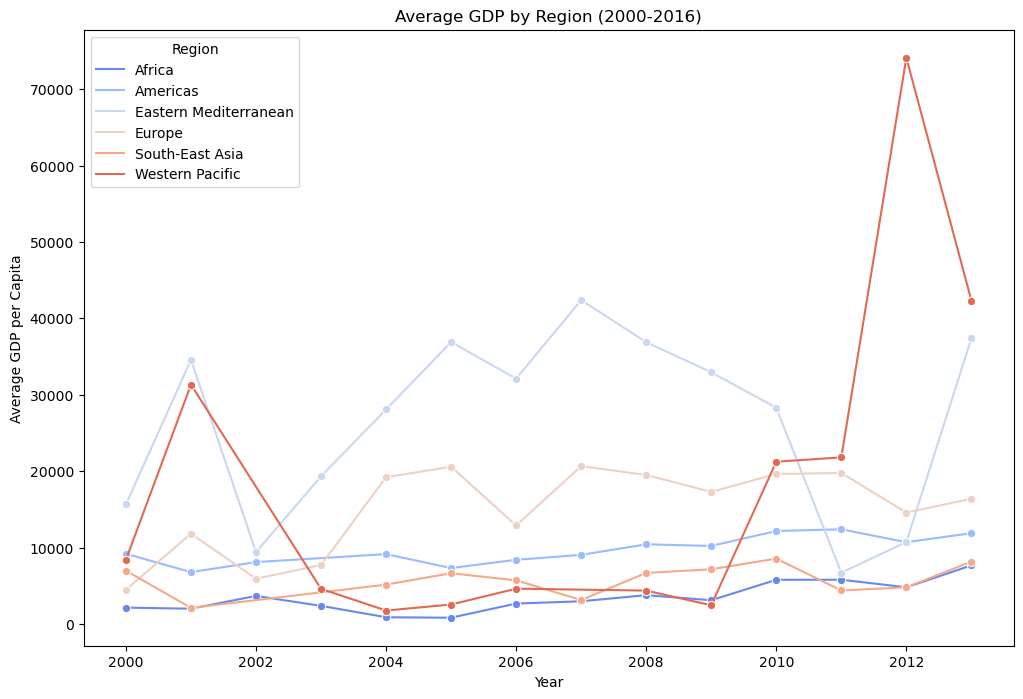

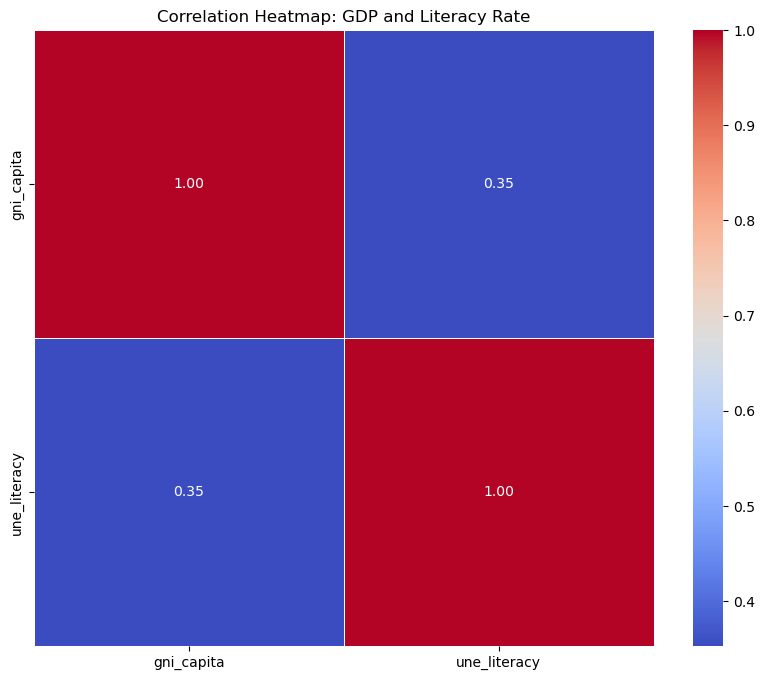

In [3]:

# Lựa chọn các cột dữ liệu để phân tích
selected_columns = ['region', 'year', 'gni_capita', 'une_literacy']

# Lọc dữ liệu và xóa các dòng có giá trị NaN
data = df[selected_columns].dropna()

# Chọn dữ liệu từ năm 2000 đến 2016
data = data[data['year'].between(2000, 2016)]
# Nhóm dữ liệu theo vùng và tính GDP và tỉ lệ người biết chữ trung bình
grouped_data = data.groupby(['region', 'year']).mean().reset_index()

# Vẽ đồ thị thể hiện sự thay đổi về GDP trung bình của từng vùng trong thời kỳ 2000-2023
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='gni_capita', hue='region', data=grouped_data, marker='o', palette='coolwarm')
plt.title('Average GDP by Region (2000-2016)')
plt.xlabel('Year')
plt.ylabel('Average GDP per Capita')
plt.legend(title='Region', loc='upper left')
plt.show()

data_1 = df[['gni_capita', 'une_literacy']]
correlation_matrix = data_1.corr()
# Vẽ correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: GDP and Literacy Rate')
plt.show()
